#**Helper Functions**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/Danu/BulkResizePhotos.com.zip /content
!mkdir data
!unzip BulkResizePhotos.com.zip -d /content/data

Streaming output truncated to the last 5000 lines.
 extracting: /content/data/0.jpg     
 extracting: /content/data/1.jpg     
 extracting: /content/data/2.jpg     
 extracting: /content/data/3.jpg     
 extracting: /content/data/4.jpg     
 extracting: /content/data/5.jpg     
 extracting: /content/data/6.jpg     
 extracting: /content/data/7.jpg     
 extracting: /content/data/8.jpg     
 extracting: /content/data/9.jpg     
 extracting: /content/data/10.jpg    
 extracting: /content/data/11.jpg    
 extracting: /content/data/12.jpg    
 extracting: /content/data/13.jpg    
 extracting: /content/data/14.jpg    
 extracting: /content/data/15.jpg    
 extracting: /content/data/16.jpg    
 extracting: /content/data/17.jpg    
 extracting: /content/data/18.jpg    
 extracting: /content/data/19.jpg    
 extracting: /content/data/20.jpg    
 extracting: /content/data/21.jpg    
 extracting: /content/data/22.jpg    
 extracting: /content/data/23.jpg    
 extracting: /content/data/24.jpg    

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

!mkdir /content/data1024/
dir_path = '/content/data'
dir2_path = '/content/data1024'
for path in os.listdir(dir_path):
  complete_path = os.path.join(dir_path, path)
  img = cv2.imread(complete_path, cv2.IMREAD_UNCHANGED)
  resized = cv2.resize(img, (1024,1024), interpolation = Image.ANTIALIAS )  #cv2.INTER_AREA
  #cv2_imshow(resized)
  new_complete_path = os.path.join(dir2_path, path)
  cv2.imwrite(new_complete_path,resized)

mkdir: cannot create directory ‘/content/data1024/’: File exists


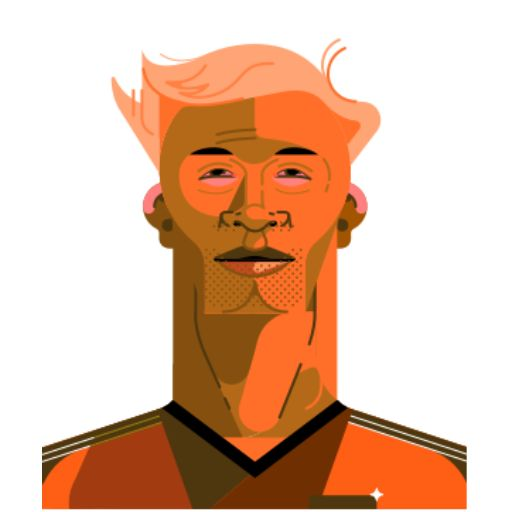

In [ ]:
img = cv2.imread('/content/data/0.jpg')
#dimensions = img.shape
#dimensions
cv2_imshow(img)

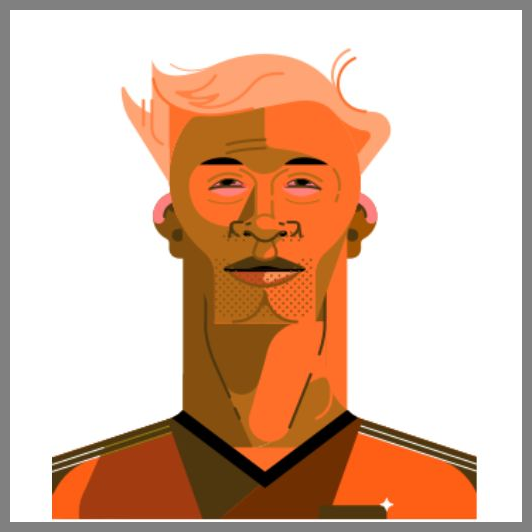

In [ ]:
import cv2
from matplotlib import colors
from google.colab.patches import cv2_imshow
import numpy as np 

# Swap function
# Swap function
def swapPositions(list, pos1, pos2):
 
    # Storing the two elements
    # as a pair in a tuple variable get
    get = list[pos1], list[pos2]
      
    # unpacking those elements
    list[pos2], list[pos1] = get
      
    return list

def add_border(path,color,width):
  image = cv2.imread(path)
  rgb = colors.to_rgb(color)
  dummy = []
  dummy.append(rgb)
  rgb_value = [x*255 for x in rgb]
  final_rgb_value = swapPositions(rgb_value,0,2)

  if width == 'thin':
    dimension = 3
  elif width == 'average':
    dimension = 10
  elif width == 'thick':
    dimension = 30 
  else:
    dimension = 0

  borderoutput = cv2.copyMakeBorder(
    image, dimension, dimension, dimension, dimension, cv2.BORDER_CONSTANT, value=final_rgb_value)
  
  return borderoutput
  #cv2.imwrite(path[:-4]+'_edited.jpg',borderoutput)
  #cv2_imshow(borderoutput)


image = add_border('/content/data/0.jpg','gray','average')
cv2_imshow(image)

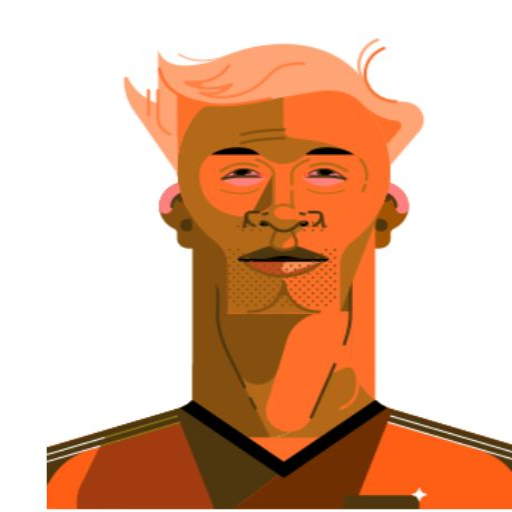

In [ ]:
import cv2
import random
from google.colab.patches import cv2_imshow


def fill(img, h, w):
    img = cv2.resize(img, (h, w), cv2.INTER_CUBIC)
    return img
        
def horizontal_shift(path, ratio=0.0):

    img = cv2.imread(path)
    if ratio > 1 or ratio < -1:
        print('Value should be less than 1 and greater than -1')
        return img
    #ratio = random.uniform(-ratio, ratio)
    h, w = img.shape[:2]
    to_shift = w*ratio
    if ratio > 0:
        img = img[:, :int(w-to_shift), :]
    if ratio < 0:
        img = img[:, int(-1*to_shift):, :]
    img = fill(img, h, w)
    return img

img = horizontal_shift('/content/data/0.jpg', 0.1)

cv2_imshow(img)

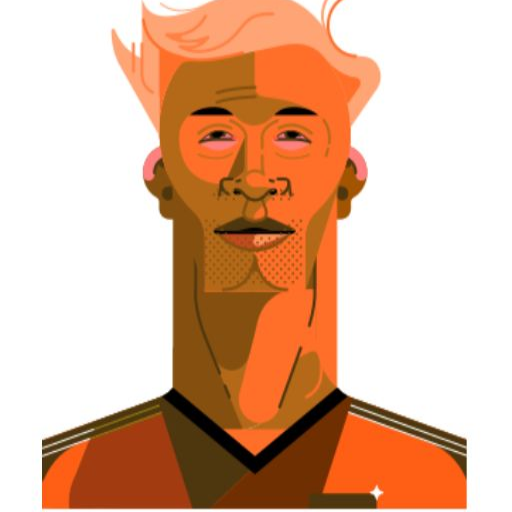

In [ ]:
import cv2
import random
from google.colab.patches import cv2_imshow


def fill(img, h, w):
    img = cv2.resize(img, (h, w), cv2.INTER_CUBIC)
    return img
def vertical_shift(path, ratio=0.0):
    img = cv2.imread(path)
    if ratio > 1 or ratio < -1:
      print('Value should be less than 1 and greater than -1')
      return img
    #ratio = random.uniform(-ratio, ratio)
    h, w = img.shape[:2]
    to_shift = h*ratio
    if ratio > 0:
        img = img[:int(h-to_shift), :, :]
    if ratio < 0:
        img = img[int(-1*to_shift):, :, :]
    img = fill(img, h, w)
    return img
    
img = vertical_shift('/content/data/0.jpg', -0.1)
cv2_imshow(img)


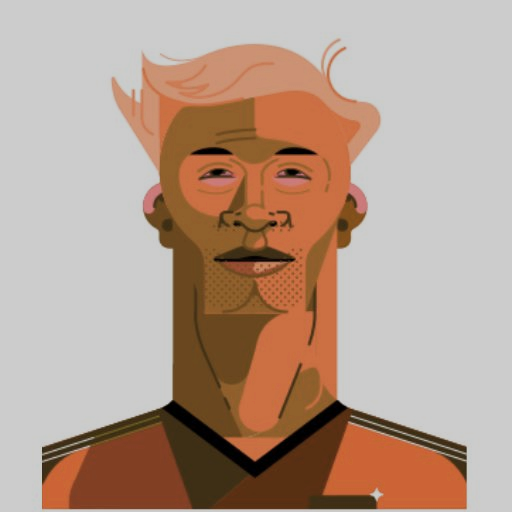

In [ ]:
import cv2
import random
import numpy as np
from google.colab.patches import cv2_imshow


def brightness(path,value):
    img = cv2.imread(path)
    #value = random.uniform(low, high)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv[:,:,1] = hsv[:,:,1]*value
    hsv[:,:,1][hsv[:,:,1]>255]  = 255
    hsv[:,:,2] = hsv[:,:,2]*value 
    hsv[:,:,2][hsv[:,:,2]>255]  = 255
    hsv = np.array(hsv, dtype = np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return img
# 0 dark , 1 not change, brighter >1 , darker <1 
img = brightness('/content/data/0.jpg',0.8)
cv2_imshow(img) 


#**Augmentation Pipeline**

In [ ]:
import os

# folder path
dir_path = r'/content/data'
count = 0
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('File count:', count)

File count: 5001


In [ ]:
!mkdir /content/Augmented
dir_path = r'/content/data/'
aug_path = '/content/Augmented/'
counter = 5001
for path in os.listdir(dir_path):
  complete_path = os.path.join(dir_path, path)
  image1 = add_border(complete_path,'Black','average')
  counter += 1
  cv2.imwrite(aug_path + str(counter) + '.jpg',image1)
  image2 = horizontal_shift(complete_path, 0.1)
  counter += 1
  cv2.imwrite(aug_path + str(counter) + '.jpg',image2)
  image3 = horizontal_shift(complete_path, -0.1)
  counter += 1
  cv2.imwrite(aug_path + str(counter) + '.jpg',image3)
  image4 = vertical_shift(complete_path, 0.1)
  counter += 1
  cv2.imwrite(aug_path + str(counter) + '.jpg',image4)
  image5 = vertical_shift(complete_path, -0.1)
  counter += 1
  cv2.imwrite(aug_path + str(counter) + '.jpg',image5)
  image6 = brightness(complete_path,1.3)
  counter += 1
  cv2.imwrite(aug_path + str(counter) + '.jpg',image6)
  image7 = brightness(complete_path,0.8)
  counter += 1
  cv2.imwrite(aug_path + str(counter) + '.jpg',image7)

In [ ]:
img = cv2.imread('/content/Augmented/5023.jpg')
cv2_imshow(img) 

#**GAN**

In [18]:
!pip install torch==1.10.0+cu113 torchvision==0.11.1+cu113 torchaudio===0.10.0+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 1.8/1.8 GB 89.1 MB/s eta 0:00:01tcmalloc: large alloc 1821417472 bytes == 0x28e4000 @  0x7fabf7300680 0x7fabf7321824 0x5b3128 0x5bbc90 0x5f714c 0x64d800 0x527022 0x504866 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x5f5ee6 0x56bbe1 0x569d8a 0x5f60c3 0x56cc92 0x569d8a 0x5f60c3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 1.8/1.8 GB 87.7 MB/s eta 0:00:01tcmalloc: large alloc 2276777984 bytes == 0x6f1ee000 @  0x7fabf7300680 0x7fabf7320da2 0x5f714c 0x64d800 0x527022 0x504866 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x5f5ee6 0x56bbe1 0x569d8a 0x5f60c3 0x56cc92 0x569d8a 0x5f

**StyleGAN3**


In [2]:
!pip install einops ninja gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 5.7 MB/s eta 0:00:00


In [5]:
import os
if os.path.isdir('/content/drive/MyDrive/StyleGAN/stylegan3/'):
    %cd '/content/drive/MyDrive/StyleGAN/stylegan3/'
else:
    !git clone https://github.com/bvshyam/stylegan3.git /content/drive/MyDrive/StyleGAN/stylegan3/
    %cd '/content/drive/MyDrive/StyleGAN/stylegan3/'

/content/drive/MyDrive/StyleGAN/stylegan3


In [15]:
!python dataset_tool.py --source=/content/drive/MyDrive/BulkResizePhotos/ --dest=/content/drive/MyDrive/StyleGAN/stylegan3/datasets/NFT-1024x1024.zip --resolution='1024x1024'

100% 5000/5000 [08:06<00:00, 10.29it/s]


In [16]:
batch_size = 32
batch_gpu_size = 8 # Batch size for GPU

dataset_path = '/content/drive/MyDrive/StyleGAN/stylegan3/datasets/NFT-1024x1024.zip'
#resume_from = '/content/drive/MyDrive/StyleGAN/stylegan3/models/stylegan3-t-afhqv2-512x512.pkl'  #Can be the link from nvidia
#resume_from ='/content/drive/MyDrive/Danu/stylegan3/models/network-a657-r-512-148863.pkl'
#'https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-afhqv2-512x512.pkl'
#https://catalog.ngc.nvidia.com/orgs/nvidia/teams/research/models/stylegan3/files
gamma_value = 50.0 #Adjustable R1 regularization weight
snapshot_count = 8

In [19]:
# Fine-tune StyleGAN3-R for MetFaces-U using 1 GPU, starting from the pre-trained FFHQ-U pickle.
#--cbase=16384
#--cfg=stylegan3-r
!python /content/drive/MyDrive/StyleGAN/stylegan3/train.py --outdir=/content/drive/MyDrive/StyleGAN/stylegan3/results --cfg=stylegan3-r \
--data=$dataset_path --gpus=1 --batch=4 --batch-gpu=4 --gamma=8.2   --kimg=1  \
--snap=8 --resume=https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-metfaces-1024x1024.pkl


Training options:
{
  "G_kwargs": {
    "class_name": "training.networks_stylegan3.Generator",
    "z_dim": 512,
    "w_dim": 512,
    "mapping_kwargs": {
      "num_layers": 2
    },
    "channel_base": 65536,
    "channel_max": 1024,
    "magnitude_ema_beta": 0.9998613801725043,
    "conv_kernel": 1,
    "use_radial_filters": true
  },
  "D_kwargs": {
    "class_name": "training.networks_stylegan2.Discriminator",
    "block_kwargs": {
      "freeze_layers": 0
    },
    "mapping_kwargs": {},
    "epilogue_kwargs": {
      "mbstd_group_size": 4
    },
    "channel_base": 32768,
    "channel_max": 512
  },
  "G_opt_kwargs": {
    "class_name": "torch.optim.Adam",
    "betas": [
      0,
      0.99
    ],
    "eps": 1e-08,
    "lr": 0.0025
  },
  "D_opt_kwargs": {
    "class_name": "torch.optim.Adam",
    "betas": [
      0,
      0.99
    ],
    "eps": 1e-08,
    "lr": 0.002
  },
  "loss_kwargs": {
    "class_name": "training.loss.StyleGAN2Loss",
    "r1_gamma": 8.2,
    "blur_init_si

**StyleGAN2**


In [ ]:
!pip uninstall tensorflow
!pip install tensorflow-gpu==1.15
!apt install --allow-change-held-packages libcudnn7=7.4.1.5-1+cuda10.0

Found existing installation: tensorflow 2.8.2+zzzcolab20220929150707
Uninstalling tensorflow-2.8.2+zzzcolab20220929150707:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.2+zzzcolab20220929150707.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.8.2+zzzcolab20220929150707
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 411.5 MB 6.3 kB/s 
     |████████████████████████████████| 3.8 MB 39.1 MB/s 
     |████████████████████████████████| 503 kB 56.3 MB/s 
     |████████████████████████████████| 50 kB 7.0 MB/s 
  Created wheel

In [ ]:
#%tensorflow_version 1.x
import tensorflow as tf

# Download the code
!git clone https://github.com/NVlabs/stylegan2.git
%cd stylegan2
!nvcc test_nvcc.cu -o test_nvcc -run

print('Tensorflow version: {}'.format(tf.__version__) )
!nvidia-smi -L
print('GPU Identified at: {}'.format(tf.test.gpu_device_name()))

fatal: destination path 'stylegan2' already exists and is not an empty directory.
/content/stylegan2
CPU says hello.
GPU says hello.
Tensorflow version: 1.15.0
GPU 0: Tesla T4 (UUID: GPU-123e113b-1aae-5dba-9f49-c78d5f18024a)
GPU Identified at: 


In [ ]:
%cd ..
#Download trained model
!wget http://d36zk2xti64re0.cloudfront.net/stylegan2/networks/stylegan2-ffhq-config-f.pkl
#Download training dataset
#!gdown https://drive.google.com/uc?id=1WjlrpvRBrDghIfZ35Smrp9nzc9PekAoa

/content
--2022-10-12 20:25:18--  http://d36zk2xti64re0.cloudfront.net/stylegan2/networks/stylegan2-ffhq-config-f.pkl
Resolving d36zk2xti64re0.cloudfront.net (d36zk2xti64re0.cloudfront.net)... 18.65.40.93, 18.65.40.28, 18.65.40.104, ...
Connecting to d36zk2xti64re0.cloudfront.net (d36zk2xti64re0.cloudfront.net)|18.65.40.93|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381673535 (364M) [application/x-www-form-urlencoded]
Saving to: ‘stylegan2-ffhq-config-f.pkl’

stylegan2-ffhq-conf 100%[===================>] 363.99M  26.4MB/s    in 7.6s    

2022-10-12 20:25:26 (47.7 MB/s) - ‘stylegan2-ffhq-config-f.pkl’ saved [381673535/381673535]

Downloading...
From: https://drive.google.com/uc?id=1WjlrpvRBrDghIfZ35Smrp9nzc9PekAoa
To: /content/cartoonset10k.tgz
100% 477M/477M [00:02<00:00, 190MB/s]


In [ ]:
#!tar -xvzf cartoonset10k.tgz
#!rm  cartoonset10k.tgz
#!rm cartoonset10k/*.csv

Streaming output truncated to the last 5000 lines.
cartoonset10k/cs11130198548099864740.csv
cartoonset10k/cs11130198548099864740.png
cartoonset10k/cs11130522928710913906.csv
cartoonset10k/cs11130522928710913906.png
cartoonset10k/cs11130692035407747496.csv
cartoonset10k/cs11130692035407747496.png
cartoonset10k/cs1113080672465802980.csv
cartoonset10k/cs1113080672465802980.png
cartoonset10k/cs11131138722323947780.csv
cartoonset10k/cs11131138722323947780.png
cartoonset10k/cs1113121412202668922.csv
cartoonset10k/cs1113121412202668922.png
cartoonset10k/cs11131333133753359573.csv
cartoonset10k/cs11131333133753359573.png
cartoonset10k/cs1113143340294813643.csv
cartoonset10k/cs1113143340294813643.png
cartoonset10k/cs11131732994961040179.csv
cartoonset10k/cs11131732994961040179.png
cartoonset10k/cs1113191746674328122.csv
cartoonset10k/cs1113191746674328122.png
cartoonset10k/cs11131958805482037869.csv
cartoonset10k/cs11131958805482037869.png
cartoonset10k/cs1113266829786440678.csv
cartoonset10k/c

In [ ]:
!mkdir /content/datasets/custom
#!unzip /content/drive/MyDrive/Danu/stylegan3/datasets/NFT-1024x1024.zip -d /content/Data
%cd /content/stylegan2/
!python dataset_tool.py create_from_images /content/datasets/custom /content/data1024
#!rm -r /content/custom/

mkdir: cannot create directory ‘/content/datasets/custom’: No such file or directory
/content/stylegan2
Loading images from "/content/data1024"
Creating dataset "/content/datasets/custom"
dataset_tool.py:86: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  'data': tf.train.Feature(bytes_list=tf.train.BytesList(value=[quant.tostring()]))}))
Added 5000 images.


In [ ]:
%cd training

[Errno 2] No such file or directory: 'training'
/content/stylegan2/training


In [ ]:
#%cd training
%%writefile training_loop.py
# Copyright (c) 2019, NVIDIA Corporation. All rights reserved.
#
# This work is made available under the Nvidia Source Code License-NC.
# To view a copy of this license, visit
# https://nvlabs.github.io/stylegan2/license.html

"""Main training script."""

import numpy as np
import tensorflow as tf
import dnnlib
import dnnlib.tflib as tflib
from dnnlib.tflib.autosummary import autosummary

from training import dataset
from training import misc
from metrics import metric_base

#----------------------------------------------------------------------------
# Just-in-time processing of training images before feeding them to the networks.

def process_reals(x, labels, lod, mirror_augment, drange_data, drange_net):
    with tf.name_scope('DynamicRange'):
        x = tf.cast(x, tf.float32)
        x = misc.adjust_dynamic_range(x, drange_data, drange_net)
    if mirror_augment:
        with tf.name_scope('MirrorAugment'):
            x = tf.where(tf.random_uniform([tf.shape(x)[0]]) < 0.5, x, tf.reverse(x, [3]))
    with tf.name_scope('FadeLOD'): # Smooth crossfade between consecutive levels-of-detail.
        s = tf.shape(x)
        y = tf.reshape(x, [-1, s[1], s[2]//2, 2, s[3]//2, 2])
        y = tf.reduce_mean(y, axis=[3, 5], keepdims=True)
        y = tf.tile(y, [1, 1, 1, 2, 1, 2])
        y = tf.reshape(y, [-1, s[1], s[2], s[3]])
        x = tflib.lerp(x, y, lod - tf.floor(lod))
    with tf.name_scope('UpscaleLOD'): # Upscale to match the expected input/output size of the networks.
        s = tf.shape(x)
        factor = tf.cast(2 ** tf.floor(lod), tf.int32)
        x = tf.reshape(x, [-1, s[1], s[2], 1, s[3], 1])
        x = tf.tile(x, [1, 1, 1, factor, 1, factor])
        x = tf.reshape(x, [-1, s[1], s[2] * factor, s[3] * factor])
    return x, labels

#----------------------------------------------------------------------------
# Evaluate time-varying training parameters.

def training_schedule(
    cur_nimg,
    training_set,
    lod_initial_resolution  = None,     # Image resolution used at the beginning.
    lod_training_kimg       = 600,      # Thousands of real images to show before doubling the resolution.
    lod_transition_kimg     = 600,      # Thousands of real images to show when fading in new layers.
    minibatch_size_base     = 16,       # Global minibatch size.
    minibatch_size_dict     = {},       # Resolution-specific overrides.
    minibatch_gpu_base      = 4,        # Number of samples processed at a time by one GPU.
    minibatch_gpu_dict      = {},       # Resolution-specific overrides.
    G_lrate_base            = 0.002,    # Learning rate for the generator.
    G_lrate_dict            = {},       # Resolution-specific overrides.
    D_lrate_base            = 0.002,    # Learning rate for the discriminator.
    D_lrate_dict            = {},       # Resolution-specific overrides.
    lrate_rampup_kimg       = 0,        # Duration of learning rate ramp-up.
    tick_kimg_base          = 160,        # Default interval of progress snapshots.
    tick_kimg_dict          = {8:28, 16:24, 32:20, 64:16, 128:12, 256:8, 512:6, 1024:4}): # Resolution-specific overrides.

    # Initialize result dict.
    s = dnnlib.EasyDict()
    s.kimg = cur_nimg / 1000.0

    # Training phase.
    phase_dur = lod_training_kimg + lod_transition_kimg
    phase_idx = int(np.floor(s.kimg / phase_dur)) if phase_dur > 0 else 0
    phase_kimg = s.kimg - phase_idx * phase_dur

    # Level-of-detail and resolution.
    if lod_initial_resolution is None:
        s.lod = 0.0
    else:
        s.lod = training_set.resolution_log2
        s.lod -= np.floor(np.log2(lod_initial_resolution))
        s.lod -= phase_idx
        if lod_transition_kimg > 0:
            s.lod -= max(phase_kimg - lod_training_kimg, 0.0) / lod_transition_kimg
        s.lod = max(s.lod, 0.0)
    s.resolution = 2 ** (training_set.resolution_log2 - int(np.floor(s.lod)))

    # Minibatch size.
    s.minibatch_size = minibatch_size_dict.get(s.resolution, minibatch_size_base)
    s.minibatch_gpu = minibatch_gpu_dict.get(s.resolution, minibatch_gpu_base)

    # Learning rate.
    s.G_lrate = G_lrate_dict.get(s.resolution, G_lrate_base)
    s.D_lrate = D_lrate_dict.get(s.resolution, D_lrate_base)
    if lrate_rampup_kimg > 0:
        rampup = min(s.kimg / lrate_rampup_kimg, 1.0)
        s.G_lrate *= rampup
        s.D_lrate *= rampup

    # Other parameters.
    s.tick_kimg = tick_kimg_dict.get(s.resolution, tick_kimg_base)
    return s

#----------------------------------------------------------------------------
# Main training script.

def training_loop(
    G_args                  = {},       # Options for generator network.
    D_args                  = {},       # Options for discriminator network.
    G_opt_args              = {},       # Options for generator optimizer.
    D_opt_args              = {},       # Options for discriminator optimizer.
    G_loss_args             = {},       # Options for generator loss.
    D_loss_args             = {},       # Options for discriminator loss.
    dataset_args            = {},       # Options for dataset.load_dataset().
    sched_args              = {},       # Options for train.TrainingSchedule.
    grid_args               = {},       # Options for train.setup_snapshot_image_grid().
    metric_arg_list         = [],       # Options for MetricGroup.
    tf_config               = {},       # Options for tflib.init_tf().
    data_dir                = None,     # Directory to load datasets from.
    G_smoothing_kimg        = 10.0,     # Half-life of the running average of generator weights.
    minibatch_repeats       = 4,        # Number of minibatches to run before adjusting training parameters.
    lazy_regularization     = True,     # Perform regularization as a separate training step?
    G_reg_interval          = 4,        # How often the perform regularization for G? Ignored if lazy_regularization=False.
    D_reg_interval          = 16,       # How often the perform regularization for D? Ignored if lazy_regularization=False.
    reset_opt_for_new_lod   = True,     # Reset optimizer internal state (e.g. Adam moments) when new layers are introduced?
    total_kimg              = 25000,    # Total length of the training, measured in thousands of real images.
    mirror_augment          = False,    # Enable mirror augment?
    drange_net              = [-1,1],   # Dynamic range used when feeding image data to the networks.
    image_snapshot_ticks    = 1,       # How often to save image snapshots? None = only save 'reals.png' and 'fakes-init.png'.
    network_snapshot_ticks  = 1,       # How often to save network snapshots? None = only save 'networks-final.pkl'.
    save_tf_graph           = False,    # Include full TensorFlow computation graph in the tfevents file?
    save_weight_histograms  = False,    # Include weight histograms in the tfevents file?
    resume_pkl              = '/content/stylegan2-ffhq-config-f.pkl',     # Network pickle to resume training from, None = train from scratch.
    resume_kimg             = 15000,      # Assumed training progress at the beginning. Affects reporting and training schedule.
    resume_time             = 0.0,      # Assumed wallclock time at the beginning. Affects reporting.
    resume_with_new_nets    = False):   # Construct new networks according to G_args and D_args before resuming training?

    # Initialize dnnlib and TensorFlow.
    tflib.init_tf(tf_config)
    num_gpus = dnnlib.submit_config.num_gpus

    # Load training set.
    training_set = dataset.load_dataset(data_dir=dnnlib.convert_path(data_dir), verbose=True, **dataset_args)
    grid_size, grid_reals, grid_labels = misc.setup_snapshot_image_grid(training_set, **grid_args)
    misc.save_image_grid(grid_reals, dnnlib.make_run_dir_path('reals.png'), drange=training_set.dynamic_range, grid_size=grid_size)

    # Construct or load networks.
    with tf.device('/gpu:0'):
        if resume_pkl is None or resume_with_new_nets:
            print('Constructing networks...')
            G = tflib.Network('G', num_channels=training_set.shape[0], resolution=training_set.shape[1], label_size=training_set.label_size, **G_args)
            D = tflib.Network('D', num_channels=training_set.shape[0], resolution=training_set.shape[1], label_size=training_set.label_size, **D_args)
            Gs = G.clone('Gs')
        if resume_pkl is not None:
            print('Loading networks from "%s"...' % resume_pkl)
            rG, rD, rGs = misc.load_pkl(resume_pkl)
            if resume_with_new_nets: G.copy_vars_from(rG); D.copy_vars_from(rD); Gs.copy_vars_from(rGs)
            else: G = rG; D = rD; Gs = rGs

    # Print layers and generate initial image snapshot.
    G.print_layers(); D.print_layers()
    sched = training_schedule(cur_nimg=total_kimg*1000, training_set=training_set, **sched_args)
    grid_latents = np.random.randn(np.prod(grid_size), *G.input_shape[1:])
    grid_fakes = Gs.run(grid_latents, grid_labels, is_validation=True, minibatch_size=sched.minibatch_gpu)
    misc.save_image_grid(grid_fakes, dnnlib.make_run_dir_path('fakes_init.png'), drange=drange_net, grid_size=grid_size)

    # Setup training inputs.
    print('Building TensorFlow graph...')
    with tf.name_scope('Inputs'), tf.device('/cpu:0'):
        lod_in               = tf.placeholder(tf.float32, name='lod_in', shape=[])
        lrate_in             = tf.placeholder(tf.float32, name='lrate_in', shape=[])
        minibatch_size_in    = tf.placeholder(tf.int32, name='minibatch_size_in', shape=[])
        minibatch_gpu_in     = tf.placeholder(tf.int32, name='minibatch_gpu_in', shape=[])
        minibatch_multiplier = minibatch_size_in // (minibatch_gpu_in * num_gpus)
        Gs_beta              = 0.5 ** tf.div(tf.cast(minibatch_size_in, tf.float32), G_smoothing_kimg * 1000.0) if G_smoothing_kimg > 0.0 else 0.0

    # Setup optimizers.
    G_opt_args = dict(G_opt_args)
    D_opt_args = dict(D_opt_args)
    for args, reg_interval in [(G_opt_args, G_reg_interval), (D_opt_args, D_reg_interval)]:
        args['minibatch_multiplier'] = minibatch_multiplier
        args['learning_rate'] = lrate_in
        if lazy_regularization:
            mb_ratio = reg_interval / (reg_interval + 1)
            args['learning_rate'] *= mb_ratio
            if 'beta1' in args: args['beta1'] **= mb_ratio
            if 'beta2' in args: args['beta2'] **= mb_ratio
    G_opt = tflib.Optimizer(name='TrainG', **G_opt_args)
    D_opt = tflib.Optimizer(name='TrainD', **D_opt_args)
    G_reg_opt = tflib.Optimizer(name='RegG', share=G_opt, **G_opt_args)
    D_reg_opt = tflib.Optimizer(name='RegD', share=D_opt, **D_opt_args)

    # Build training graph for each GPU.
    data_fetch_ops = []
    for gpu in range(num_gpus):
        with tf.name_scope('GPU%d' % gpu), tf.device('/gpu:%d' % gpu):

            # Create GPU-specific shadow copies of G and D.
            G_gpu = G if gpu == 0 else G.clone(G.name + '_shadow')
            D_gpu = D if gpu == 0 else D.clone(D.name + '_shadow')

            # Fetch training data via temporary variables.
            with tf.name_scope('DataFetch'):
                sched = training_schedule(cur_nimg=int(resume_kimg*1000), training_set=training_set, **sched_args)
                reals_var = tf.Variable(name='reals', trainable=False, initial_value=tf.zeros([sched.minibatch_gpu] + training_set.shape))
                labels_var = tf.Variable(name='labels', trainable=False, initial_value=tf.zeros([sched.minibatch_gpu, training_set.label_size]))
                reals_write, labels_write = training_set.get_minibatch_tf()
                reals_write, labels_write = process_reals(reals_write, labels_write, lod_in, mirror_augment, training_set.dynamic_range, drange_net)
                reals_write = tf.concat([reals_write, reals_var[minibatch_gpu_in:]], axis=0)
                labels_write = tf.concat([labels_write, labels_var[minibatch_gpu_in:]], axis=0)
                data_fetch_ops += [tf.assign(reals_var, reals_write)]
                data_fetch_ops += [tf.assign(labels_var, labels_write)]
                reals_read = reals_var[:minibatch_gpu_in]
                labels_read = labels_var[:minibatch_gpu_in]

            # Evaluate loss functions.
            lod_assign_ops = []
            if 'lod' in G_gpu.vars: lod_assign_ops += [tf.assign(G_gpu.vars['lod'], lod_in)]
            if 'lod' in D_gpu.vars: lod_assign_ops += [tf.assign(D_gpu.vars['lod'], lod_in)]
            with tf.control_dependencies(lod_assign_ops):
                with tf.name_scope('G_loss'):
                    G_loss, G_reg = dnnlib.util.call_func_by_name(G=G_gpu, D=D_gpu, opt=G_opt, training_set=training_set, minibatch_size=minibatch_gpu_in, **G_loss_args)
                with tf.name_scope('D_loss'):
                    D_loss, D_reg = dnnlib.util.call_func_by_name(G=G_gpu, D=D_gpu, opt=D_opt, training_set=training_set, minibatch_size=minibatch_gpu_in, reals=reals_read, labels=labels_read, **D_loss_args)

            # Register gradients.
            if not lazy_regularization:
                if G_reg is not None: G_loss += G_reg
                if D_reg is not None: D_loss += D_reg
            else:
                if G_reg is not None: G_reg_opt.register_gradients(tf.reduce_mean(G_reg * G_reg_interval), G_gpu.trainables)
                if D_reg is not None: D_reg_opt.register_gradients(tf.reduce_mean(D_reg * D_reg_interval), D_gpu.trainables)
            G_opt.register_gradients(tf.reduce_mean(G_loss), G_gpu.trainables)
            D_opt.register_gradients(tf.reduce_mean(D_loss), D_gpu.trainables)

    # Setup training ops.
    data_fetch_op = tf.group(*data_fetch_ops)
    G_train_op = G_opt.apply_updates()
    D_train_op = D_opt.apply_updates()
    G_reg_op = G_reg_opt.apply_updates(allow_no_op=True)
    D_reg_op = D_reg_opt.apply_updates(allow_no_op=True)
    Gs_update_op = Gs.setup_as_moving_average_of(G, beta=Gs_beta)

    # Finalize graph.
    with tf.device('/gpu:0'):
        try:
            peak_gpu_mem_op = tf.contrib.memory_stats.MaxBytesInUse()
        except tf.errors.NotFoundError:
            peak_gpu_mem_op = tf.constant(0)
    tflib.init_uninitialized_vars()

    print('Initializing logs...')
    summary_log = tf.summary.FileWriter(dnnlib.make_run_dir_path())
    if save_tf_graph:
        summary_log.add_graph(tf.get_default_graph())
    if save_weight_histograms:
        G.setup_weight_histograms(); D.setup_weight_histograms()
    metrics = metric_base.MetricGroup(metric_arg_list)

    print('Training for %d kimg...\n' % total_kimg)
    dnnlib.RunContext.get().update('', cur_epoch=resume_kimg, max_epoch=total_kimg)
    maintenance_time = dnnlib.RunContext.get().get_last_update_interval()
    cur_nimg = int(resume_kimg * 1000)
    cur_tick = -1
    tick_start_nimg = cur_nimg
    prev_lod = -1.0
    running_mb_counter = 0
    while cur_nimg < total_kimg * 1000:
        if dnnlib.RunContext.get().should_stop(): break

        # Choose training parameters and configure training ops.
        sched = training_schedule(cur_nimg=cur_nimg, training_set=training_set, **sched_args)
        assert sched.minibatch_size % (sched.minibatch_gpu * num_gpus) == 0
        training_set.configure(sched.minibatch_gpu, sched.lod)
        if reset_opt_for_new_lod:
            if np.floor(sched.lod) != np.floor(prev_lod) or np.ceil(sched.lod) != np.ceil(prev_lod):
                G_opt.reset_optimizer_state(); D_opt.reset_optimizer_state()
        prev_lod = sched.lod

        # Run training ops.
        feed_dict = {lod_in: sched.lod, lrate_in: sched.G_lrate, minibatch_size_in: sched.minibatch_size, minibatch_gpu_in: sched.minibatch_gpu}
        for _repeat in range(minibatch_repeats):
            rounds = range(0, sched.minibatch_size, sched.minibatch_gpu * num_gpus)
            run_G_reg = (lazy_regularization and running_mb_counter % G_reg_interval == 0)
            run_D_reg = (lazy_regularization and running_mb_counter % D_reg_interval == 0)
            cur_nimg += sched.minibatch_size
            running_mb_counter += 1

            # Fast path without gradient accumulation.
            if len(rounds) == 1:
                tflib.run([G_train_op, data_fetch_op], feed_dict)
                if run_G_reg:
                    tflib.run(G_reg_op, feed_dict)
                tflib.run([D_train_op, Gs_update_op], feed_dict)
                if run_D_reg:
                    tflib.run(D_reg_op, feed_dict)

            # Slow path with gradient accumulation.
            else:
                for _round in rounds:
                    tflib.run(G_train_op, feed_dict)
                if run_G_reg:
                    for _round in rounds:
                        tflib.run(G_reg_op, feed_dict)
                tflib.run(Gs_update_op, feed_dict)
                for _round in rounds:
                    tflib.run(data_fetch_op, feed_dict)
                    tflib.run(D_train_op, feed_dict)
                if run_D_reg:
                    for _round in rounds:
                        tflib.run(D_reg_op, feed_dict)

        # Perform maintenance tasks once per tick.
        done = (cur_nimg >= total_kimg * 1000)
        if cur_tick < 0 or cur_nimg >= tick_start_nimg + sched.tick_kimg * 1000 or done:
            cur_tick += 1
            tick_kimg = (cur_nimg - tick_start_nimg) / 1000.0
            tick_start_nimg = cur_nimg
            tick_time = dnnlib.RunContext.get().get_time_since_last_update()
            total_time = dnnlib.RunContext.get().get_time_since_start() + resume_time

            # Report progress.
            print('tick %-5d kimg %-8.1f lod %-5.2f minibatch %-4d time %-12s sec/tick %-7.1f sec/kimg %-7.2f maintenance %-6.1f gpumem %.1f' % (
                autosummary('Progress/tick', cur_tick),
                autosummary('Progress/kimg', cur_nimg / 1000.0),
                autosummary('Progress/lod', sched.lod),
                autosummary('Progress/minibatch', sched.minibatch_size),
                dnnlib.util.format_time(autosummary('Timing/total_sec', total_time)),
                autosummary('Timing/sec_per_tick', tick_time),
                autosummary('Timing/sec_per_kimg', tick_time / tick_kimg),
                autosummary('Timing/maintenance_sec', maintenance_time),
                autosummary('Resources/peak_gpu_mem_gb', peak_gpu_mem_op.eval() / 2**30)))
            autosummary('Timing/total_hours', total_time / (60.0 * 60.0))
            autosummary('Timing/total_days', total_time / (24.0 * 60.0 * 60.0))

            # Save snapshots.
            if image_snapshot_ticks is not None and (cur_tick % image_snapshot_ticks == 0 or done):
                grid_fakes = Gs.run(grid_latents, grid_labels, is_validation=True, minibatch_size=sched.minibatch_gpu)
                misc.save_image_grid(grid_fakes, dnnlib.make_run_dir_path('fakes%06d.png' % (cur_nimg // 1000)), drange=drange_net, grid_size=grid_size)
            if network_snapshot_ticks is not None and (cur_tick % network_snapshot_ticks == 0 or done):
                pkl = dnnlib.make_run_dir_path('network-snapshot-%06d.pkl' % (cur_nimg // 1000))
                misc.save_pkl((G, D, Gs), pkl)
                metrics.run(pkl, run_dir=dnnlib.make_run_dir_path(), data_dir=dnnlib.convert_path(data_dir), num_gpus=num_gpus, tf_config=tf_config)

            # Update summaries and RunContext.
            metrics.update_autosummaries()
            tflib.autosummary.save_summaries(summary_log, cur_nimg)
            dnnlib.RunContext.get().update('%.2f' % sched.lod, cur_epoch=cur_nimg // 1000, max_epoch=total_kimg)
            maintenance_time = dnnlib.RunContext.get().get_last_update_interval() - tick_time

    # Save final snapshot.
    misc.save_pkl((G, D, Gs), dnnlib.make_run_dir_path('network-final.pkl'))

    # All done.
    summary_log.close()
    training_set.close()

#----------------------------------------------------------------------------


Writing training_loop.py


In [ ]:
%cd ..

/content


In [ ]:
dataset = 'custom'
data_dir = '/content/datasets/'
config_id = 'config-f'
num_gpus = 1
total_kimg = 100000
mirror_augment = True
metrics = []
gamma = None
result_dir = '/content/saves/'

In [ ]:
#!pip install dnnlib-util
!pip install tensorflow-gpu

In [ ]:
%cd /content/stylegan2

/content/stylegan2


In [ ]:
# Copyright (c) 2019, NVIDIA Corporation. All rights reserved.
#
# This work is made available under the Nvidia Source Code License-NC.
# To view a copy of this license, visit
# https://nvlabs.github.io/stylegan2/license.html

import argparse
import copy
import os
import sys

import dnnlib
from dnnlib import EasyDict

from metrics.metric_defaults import metric_defaults

#----------------------------------------------------------------------------

_valid_configs = [
    # Table 1
    'config-a', # Baseline StyleGAN
    'config-b', # + Weight demodulation
    'config-c', # + Lazy regularization
    'config-d', # + Path length regularization
    'config-e', # + No growing, new G & D arch.
    'config-f', # + Large networks (default)

    # Table 2
    'config-e-Gorig-Dorig',   'config-e-Gorig-Dresnet',   'config-e-Gorig-Dskip',
    'config-e-Gresnet-Dorig', 'config-e-Gresnet-Dresnet', 'config-e-Gresnet-Dskip',
    'config-e-Gskip-Dorig',   'config-e-Gskip-Dresnet',   'config-e-Gskip-Dskip',
]

#----------------------------------------------------------------------------

train     = EasyDict(run_func_name='training.training_loop.training_loop') # Options for training loop.
G         = EasyDict(func_name='training.networks_stylegan2.G_main')       # Options for generator network.
D         = EasyDict(func_name='training.networks_stylegan2.D_stylegan2')  # Options for discriminator network.
G_opt     = EasyDict(beta1=0.0, beta2=0.99, epsilon=1e-8)                  # Options for generator optimizer.
D_opt     = EasyDict(beta1=0.0, beta2=0.99, epsilon=1e-8)                  # Options for discriminator optimizer.
G_loss    = EasyDict(func_name='training.loss.G_logistic_ns_pathreg')      # Options for generator loss.
D_loss    = EasyDict(func_name='training.loss.D_logistic_r1')              # Options for discriminator loss.
sched     = EasyDict()                                                     # Options for TrainingSchedule.
grid      = EasyDict(size='8k', layout='random')                           # Options for setup_snapshot_image_grid().
sc        = dnnlib.SubmitConfig()                                          # Options for dnnlib.submit_run().
tf_config = {'rnd.np_random_seed': 1000}                                   # Options for tflib.init_tf().

train.data_dir = data_dir
train.total_kimg = total_kimg
train.mirror_augment = mirror_augment
train.image_snapshot_ticks = train.network_snapshot_ticks = 1
sched.G_lrate_base = sched.D_lrate_base = 0.002
sched.minibatch_size_base = 32
sched.minibatch_gpu_base = 4
D_loss.gamma = 10
metrics = [metric_defaults[x] for x in metrics]
desc = 'stylegan2'

desc += '-' + dataset
dataset_args = EasyDict(tfrecord_dir=dataset)

assert num_gpus in [1, 2, 4, 8]
sc.num_gpus = num_gpus
desc += '-%dgpu' % num_gpus

assert config_id in _valid_configs
desc += '-' + config_id

# Configs A-E: Shrink networks to match original StyleGAN.
if config_id != 'config-f':
    G.fmap_base = D.fmap_base = 8 << 10

# Config E: Set gamma to 100 and override G & D architecture.
if config_id.startswith('config-e'):
    D_loss.gamma = 100
    if 'Gorig'   in config_id: G.architecture = 'orig'
    if 'Gskip'   in config_id: G.architecture = 'skip' # (default)
    if 'Gresnet' in config_id: G.architecture = 'resnet'
    if 'Dorig'   in config_id: D.architecture = 'orig'
    if 'Dskip'   in config_id: D.architecture = 'skip'
    if 'Dresnet' in config_id: D.architecture = 'resnet' # (default)

# Configs A-D: Enable progressive growing and switch to networks that support it.
if config_id in ['config-a', 'config-b', 'config-c', 'config-d']:
    sched.lod_initial_resolution = 8
    sched.G_lrate_base = sched.D_lrate_base = 0.001
    sched.G_lrate_dict = sched.D_lrate_dict = {128: 0.0015, 256: 0.002, 512: 0.003, 1024: 0.003}
    sched.minibatch_size_base = 32 # (default)
    sched.minibatch_size_dict = {8: 256, 16: 128, 32: 64, 64: 32}
    sched.minibatch_gpu_base = 4 # (default)
    sched.minibatch_gpu_dict = {8: 32, 16: 16, 32: 8, 64: 4}
    G.synthesis_func = 'G_synthesis_stylegan_revised'
    D.func_name = 'training.networks_stylegan2.D_stylegan'

# Configs A-C: Disable path length regularization.
if config_id in ['config-a', 'config-b', 'config-c']:
    G_loss = EasyDict(func_name='training.loss.G_logistic_ns')

# Configs A-B: Disable lazy regularization.
if config_id in ['config-a', 'config-b']:
    train.lazy_regularization = False

# Config A: Switch to original StyleGAN networks.
if config_id == 'config-a':
    G = EasyDict(func_name='training.networks_stylegan.G_style')
    D = EasyDict(func_name='training.networks_stylegan.D_basic')

if gamma is not None:
    D_loss.gamma = gamma

sc.submit_target = dnnlib.SubmitTarget.LOCAL
sc.local.do_not_copy_source_files = True

#----------------------------------------------------------------------------

def main():
    kwargs = EasyDict(train)
    kwargs.update(G_args=G, D_args=D, G_opt_args=G_opt, D_opt_args=D_opt, G_loss_args=G_loss, D_loss_args=D_loss)
    kwargs.update(dataset_args=dataset_args, sched_args=sched, grid_args=grid, metric_arg_list=metrics, tf_config=tf_config)
    kwargs.submit_config = copy.deepcopy(sc)
    kwargs.submit_config.run_dir_root = result_dir
    kwargs.submit_config.run_desc = desc
    dnnlib.submit_run(**kwargs)

#----------------------------------------------------------------------------

if __name__ == "__main__":
    main()

#----------------------------------------------------------------------------

Local submit - run_dir: /content/saves/00006-stylegan2-custom-1gpu-config-f
dnnlib: Running training.training_loop.training_loop() on localhost...
Streaming data using training.dataset.TFRecordDataset...
Dataset shape = [3, 1024, 1024]
Dynamic range = [0, 255]
Label size    = 0
Loading networks from "/content/stylegan2-ffhq-config-f.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Failed!


RuntimeError: ignored

In [ ]:
import tensorflow as tf
se = tf.Session(config=tf.ConfigProto(allow_soft_placement=True))

In [ ]:
!pip uninstall tensorflow-gpu
!conda install -c anaconda tensorflow-gpu

Found existing installation: tensorflow-gpu 1.15.0
Uninstalling tensorflow-gpu-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
    /usr/local/lib/python3.7/dist-packages/tensorflow_core/*
    /usr/local/lib/python3.7/dist-packages/tensorflow_gpu-1.15.0.dist-info/*
Proceed (y/n)? ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/main.py", line 71, in main
    return command.main(cmd_args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 104, in main
    return self._main(args)
  File "/usr/local/lib/